# Actividad Semanal 4

## TC4029 Ciencia y analítica de datos (Gpo 10)

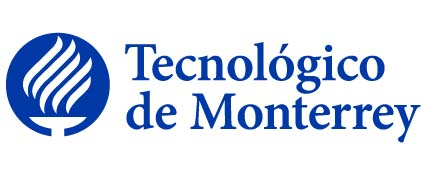

#### Profesores : Jobish Vallikavungal Devassia, Victoria Guerrero Orozco

#### Alumnos:  Armando Bringas Corpus (A01200230)

## Parte 1 

### 0. Preprocesamiento de los Datos

In [1]:
# Importación de librerías

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

#### Datos

Importación de los datos del repositorio

In [2]:
input_data = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

df = pd.read_csv(input_data)
df.head(10)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
5,6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
6,7,500000,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
7,8,100000,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
8,9,140000,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
9,10,20000,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,-2.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


In [3]:
# Nombre de las columnas

df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

Recodificación de los datos en variables categóricas y numéricas

In [4]:
df['ID'] = df['ID'].astype('category')
df['X1'] = df['X1'].astype('float64')
df['X2'] = df['X2'].astype('category')
df['X3'] = df['X3'].astype('category')
df['X4'] = df['X4'].astype('category')
df.dtypes

ID     category
X1      float64
X2     category
X3     category
X4     category
X5      float64
X6      float64
X7      float64
X8      float64
X9      float64
X10     float64
X11     float64
X12     float64
X13     float64
X14     float64
X15     float64
X16     float64
X17     float64
X18     float64
X19     float64
X20     float64
X21     float64
X22     float64
X23     float64
Y       float64
dtype: object

#### Limpieza de Datos

Remoción de todos los registros que tengan valores NaN (Not a Number)

In [5]:
df.dropna(inplace=True)

In [6]:
# Columnas y filas

df.shape

(29958, 25)

#### Normalización de los Datos

Para PCA sólo se consideran las variables numéricas

In [7]:
# Separación de las variables de entrada 'X' y salida 'y'

X = df.drop(['ID','X2','X3','X4','Y'], axis=1)
y = df['Y']

In [8]:
# Nombre de las columnas de X

X.columns

Index(['X1', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14',
       'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23'],
      dtype='object')

In [9]:
# Normalización de los datos

scaled_data = preprocessing.scale(X.T)
scaled_data

array([[ 4.23178348,  4.35372274,  3.99718577, ...,  2.45927791,
         1.67910284,  1.76416651],
       [-0.31813682, -0.27300936, -0.50556187, ..., -0.68868439,
        -0.74836539, -0.71559279],
       [-0.32314775, -0.2740506 , -0.50726356, ..., -0.69215142,
        -0.74957975, -0.71787627],
       ...,
       [-0.32360329, -0.23544758, -0.45721412, ..., -0.25131273,
        -0.69113885, -0.66823541],
       [-0.32360329, -0.27401203, -0.45721412, ..., -0.48244836,
         0.8583193 , -0.66823541],
       [-0.32360329, -0.19688312, -0.25701637, ..., -0.36688054,
        -0.69484263, -0.66823541]])

### 1. Determinación del número mínimo de componentes principales que representan la mayor parte de la variación en los datos

#### Creación de modelo de PCA

In [10]:
# Creación de modelo de PCA

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_data

array([[ 5.52658905e+02,  1.74542621e+02, -7.78768848e-01,
         5.06440915e-01, -5.62487911e-02, -5.07427096e-02,
        -2.25511423e-01, -1.26206811e+00, -1.38483614e+00,
        -1.78293467e-02,  1.08412339e-01,  2.14776914e-02,
        -2.30749949e-02, -6.01204501e-05, -7.91312571e-11,
        -1.44629054e-08,  5.55325237e-09, -4.26990604e-09,
         3.65328972e-10, -2.44628970e-13],
       [-9.11989358e+01,  3.80428885e+01,  4.23430800e+00,
        -6.71688148e-01,  1.14305990e+00,  3.21928988e-01,
        -1.33850450e+00, -7.56346812e+00, -8.05996164e+00,
        -1.46861351e+00,  6.34579356e-01,  2.23634712e-02,
        -2.02835710e-01,  2.69064706e-01, -1.18966391e-04,
         6.32651345e-06,  3.07303061e-05,  9.45248621e-06,
        -2.32569826e-06,  5.99329614e-14],
       [-9.14673625e+01,  3.80850202e+01,  4.24612811e+00,
        -6.81724653e-01,  1.14042573e+00,  3.32084082e-01,
        -1.35006794e+00, -7.59114447e+00, -8.11706163e+00,
        -1.45727472e+00,  6.4

Porcentaje de varianza por componente

In [11]:
# Por porcentaje de varianza por componente del modelo de PCA

per_var = np.round(pca.explained_variance_ratio_*100, decimals=4)
labels=['PC' + str(x) for x in range(1, len(per_var)+1)]

print("\n".join("{} : % {}".format(x, y) for x, y in zip(labels, per_var)))

PC1 : % 73.381
PC2 : % 20.053
PC3 : % 2.6112
PC4 : % 0.9519
PC5 : % 0.6097
PC6 : % 0.5358
PC7 : % 0.4818
PC8 : % 0.3816
PC9 : % 0.3397
PC10 : % 0.2247
PC11 : % 0.1761
PC12 : % 0.1378
PC13 : % 0.1157
PC14 : % 0.0
PC15 : % 0.0
PC16 : % 0.0
PC17 : % 0.0
PC18 : % 0.0
PC19 : % 0.0
PC20 : % 0.0


#### Sumario de PCA

In [12]:
summary_pca_df = pd.DataFrame({'Standard_Deviation': np.sqrt(pca.explained_variance_),
                               'Proportion_of_Variance': pca.explained_variance_ratio_,
                               'Cumulative proportion' : np.cumsum(pca.explained_variance_ratio_)
                              })
summary_pca_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Standard_Deviation,152.120037,79.521388,28.695358,17.325636,13.866148,12.999114,12.325922,10.970364,10.349900,8.417976,7.451078,6.592827,6.040143,6.664981e-02,3.651708e-03,2.625598e-03,2.051630e-03,1.784453e-03,1.329583e-03,1.198456e-14
Proportion_of_Variance,0.733810,0.200530,0.026112,0.009519,0.006097,0.005358,0.004818,0.003816,0.003397,0.002247,0.001761,0.001378,0.001157,1.408668e-07,4.228661e-10,2.186086e-10,1.334777e-10,1.009767e-10,5.605850e-11,4.554647e-33
Cumulative proportion,0.733810,0.934340,0.960451,0.969970,0.976067,0.981426,0.986244,0.990060,0.993457,0.995704,0.997465,0.998843,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Podemos observar que los primeros dos componentes son los que más contribuyen con un 93.434 % del total asociado con las variables originales.

#### Scree Plot

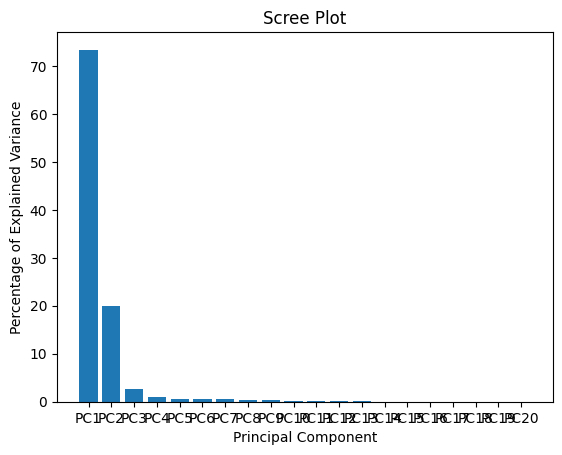

In [13]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Explained Variance')
plt.title('Scree Plot')
plt.show()

### 3. Identificación de Valores Atípicos

#### Scatter Plot

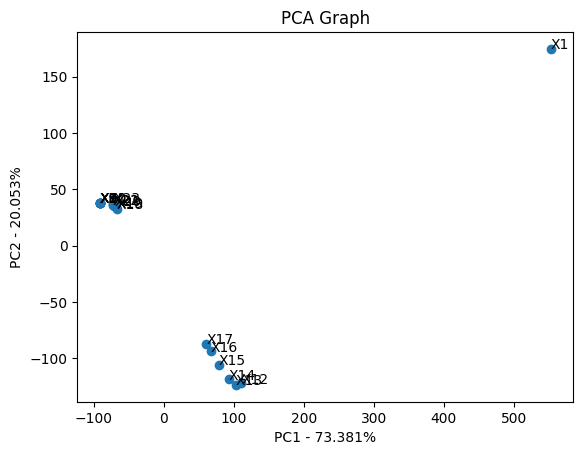

In [26]:
pca_df = pd.DataFrame(pca_data, index=X.columns, columns=labels)

plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df['PC1'].loc[sample], pca_df['PC2'].loc[sample]))
    
plt.show()

Aún cuando normalizamos los datos, podemos ver en el gráfico de dispersión como la variable X1 no tiene una correlación con el resto de las variables, vamos a proceder a removerla y a repetir el ejercio de análisis de PCA

In [15]:
# Remover X1

X_1 = X.drop(['X1'], axis=1)
X_1.head()

,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [16]:
# Normalización de los datos

scaled_data_1 = preprocessing.scale(X_1.T)
scaled_data_1

array([[-0.38790532, -0.87758084, -0.72135219, ..., -0.66020069,
        -0.69707497, -0.66376747],
       [-0.40827778, -0.89841181, -0.72551066, ..., -0.66429357,
        -0.69835756, -0.66620138],
       [-0.40827778, -0.89609726, -0.72551066, ..., -0.6644176 ,
        -0.69842169, -0.66620138],
       ...,
       [-0.41012983, -0.12612281, -0.60320284, ..., -0.14387751,
        -0.636633  , -0.61329024],
       [-0.41012983, -0.8976403 , -0.60320284, ..., -0.41673627,
         0.99988565, -0.61329024],
       [-0.41012983,  0.64539468, -0.11397157, ..., -0.28030689,
        -0.64054489, -0.61329024]])

In [17]:
# Creación de modelo de PCA

pca_1 = PCA()
pca_1.fit(scaled_data_1)
pca_data_1 = pca.transform(scaled_data_1)
pca_data_1

array([[-9.25985255e+01,  3.63137181e+01,  6.73237414e+00,
        -1.74947373e+00,  1.84498289e+00,  7.70892569e-01,
        -2.39520347e+00, -1.51921390e+01, -1.81289468e+01,
        -3.07729718e+00,  1.92453360e+00,  3.71642562e-02,
        -1.07806128e+00,  7.94346096e+00,  9.86656466e+00,
         1.87616130e+01, -1.14125546e+01,  6.26121509e+00,
         6.88043747e-01, -5.71986011e-01],
       [-1.16100332e+02,  9.64820804e+00,  7.64599057e+00,
        -3.38438425e+00,  2.12159453e+00,  1.07418256e+00,
        -9.95161206e-01, -5.27753192e+00, -5.95111404e+00,
        -2.81976168e+00,  1.11972483e-01, -4.20717535e-01,
        -4.85808559e-01,  1.85044194e+00,  2.92749228e+00,
         3.63012025e+00, -2.51548202e+00,  1.03777400e+00,
         2.55412107e-01,  9.03388505e-02],
       [-1.17242108e+02,  8.32761676e+00,  7.69208240e+00,
        -3.46612694e+00,  2.13703154e+00,  1.08944103e+00,
        -9.24273806e-01, -4.77738342e+00, -5.33395149e+00,
        -2.80717395e+00,  1.9

In [18]:
# Por porcentaje de varianza por componente del modelo de PCA

per_var_1 = np.round(pca_1.explained_variance_ratio_*100, decimals=4)
labels_1=['PC' + str(x) for x in range(1, len(per_var_1)+1)]

print("\n".join("{} : % {}".format(x, y) for x, y in zip(labels_1, per_var_1)))

PC1 : % 60.7232
PC2 : % 8.9578
PC3 : % 5.8548
PC4 : % 5.0911
PC5 : % 4.1035
PC6 : % 3.8806
PC7 : % 3.5093
PC8 : % 2.9067
PC9 : % 2.5547
PC10 : % 1.0643
PC11 : % 0.601
PC12 : % 0.4146
PC13 : % 0.3337
PC14 : % 0.0046
PC15 : % 0.0
PC16 : % 0.0
PC17 : % 0.0
PC18 : % 0.0
PC19 : % 0.0


In [19]:
summary_pca_1_df = pd.DataFrame({'Standard_Deviation': np.sqrt(pca_1.explained_variance_),
                               'Proportion_of_Variance': pca_1.explained_variance_ratio_,
                               'Cumulative proportion' : np.cumsum(pca_1.explained_variance_ratio_)
                              })
summary_pca_1_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Standard_Deviation,138.571559,53.222892,43.028034,40.124027,36.022714,35.030329,33.312375,30.317846,28.422777,18.345354,13.786135,11.450607,10.273231,1.207368,6.459160e-02,4.601490e-02,2.978664e-02,2.051686e-02,2.290596e-14
Proportion_of_Variance,0.607232,0.089578,0.058548,0.050911,0.041035,0.038806,0.035093,0.029067,0.025547,0.010643,0.006010,0.004146,0.003337,0.000046,1.319345e-07,6.695809e-08,2.805752e-08,1.331152e-08,1.659217e-32
Cumulative proportion,0.607232,0.696810,0.755357,0.806269,0.847304,0.886110,0.921203,0.950270,0.975817,0.986460,0.992470,0.996616,0.999954,1.000000,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Ahora podemos observar que hasta el componente 6 tenemos una acumulación del 92.12%

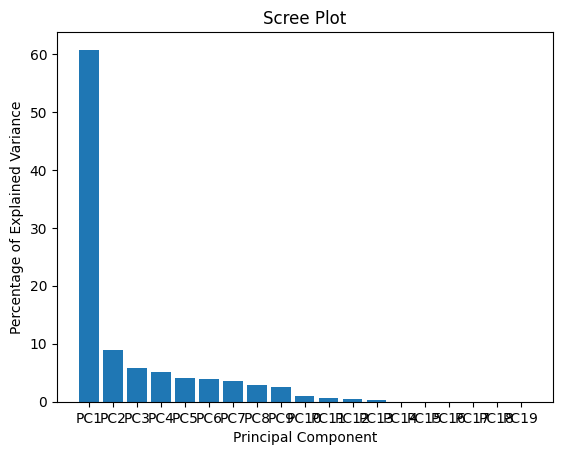

In [20]:
plt.bar(x=range(1,len(per_var_1)+1), height=per_var_1, tick_label=labels_1)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Explained Variance')
plt.title('Scree Plot')
plt.show()

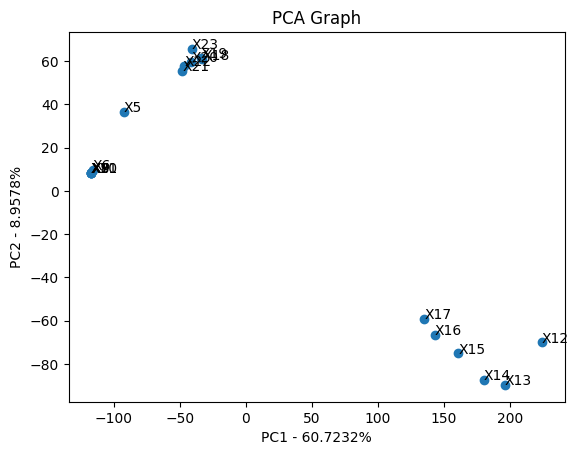

In [30]:
pca_df_1 = pd.DataFrame(pca_data_1, index=X_1.columns, columns=labels)

plt.scatter(pca_df_1['PC1'], pca_df_1['PC2'])
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var_1[0]))
plt.ylabel('PC2 - {0}%'.format(per_var_1[1]))

for sample in pca_df_1.index:
    plt.annotate(sample, (pca_df_1['PC1'].loc[sample], pca_df_1['PC2'].loc[sample]))
    
plt.show()

## Parte 2

### 1. ¿Cuál es el número de componentes mínimo y por qué?

### 2. ¿Cuál es la variación de los datos que representan esos componentes?

### 3. ¿Cuál es la pérdida de información después de realizar PCA?

### 4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

### 5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

### Referencias

 https://www.cienciadedatos.net/documentos/py19-pca-python.html
 
 https://www.youtube.com/watch?v=FgakZw6K1QQ